In [628]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score


In [629]:
# ignore FutrueWarning

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [630]:
# constants
init_w = np.array([0.0, 0.0, 0.0, 0.0])

np.random.seed(123)

In [631]:
# gradient descent functions
def initialize_weights():
    return init_w

def predict(x, weights):
    return np.dot(x, weights)   

def compute_cost(y, y_hat):
    return np.mean((y_hat - y)**2) / 2

def compute_gradient(x, y, y_hat, learning_rate):
    return np.mean(x.T * (y_hat - y), axis=1) * learning_rate

def update_weights(weight, gradient):
    return weight - gradient 

def grad_descent(x, y, learning_rate, num_iterations):
    weights = initialize_weights()
    cost_history = []
    
    for i in range(num_iterations):
        y_hat = predict(x, weights)
        cost = compute_cost(y, y_hat)
        cost_history.append(cost)
        
        gradient = compute_gradient(x, y, y_hat, learning_rate)
        weights = update_weights(weights, gradient)
    return weights, cost_history

def plot_costs(cost_history, learning_rate):
    plt.figure(figsize=(10, 10))

    plt.scatter(
        x=range(len(cost_history)),
        y=cost_history
    )
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost vs Iterations, Learning Rate={}'.format(learning_rate))
    plt.yticks(np.arange(0, round(max(cost_history), 2), step=0.05))
    plt.show()



In [632]:
# import raw data

raw_data = pd.read_csv('data/Advertising.csv').drop('Unnamed: 0', axis=1)
raw_data.columns = [col.lower() for col in raw_data.columns]

raw_data.head()

,tv,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [633]:
# standardization functions

def scale(unscaled, feature='sales'):
    scaled_data = (unscaled - raw_data[feature].mean()) / raw_data[feature].std()
    return scaled_data

def calculate_orig(scaled, feature='sales'):
    calculated_original = scaled * raw_data[feature].std() + raw_data[feature].mean()
    return calculated_original

In [634]:
# scale data

scaled_data = raw_data.copy()

for col in raw_data.columns:
    scaled_data[col] = raw_data[col].apply(lambda x: scale(x, feature=col))


scaled_data.head()

,tv,radio,newspaper,sales
0,0.967425,0.979066,1.774493,1.548168
1,-1.194379,1.080097,0.667903,-0.694304
2,-1.512360,1.524637,1.779084,-0.905135
3,0.051919,1.214806,1.283185,0.858177
4,0.393196,-0.839507,1.278593,-0.215143


In [635]:
# insert bias term

data = scaled_data.copy()
data.insert(0, 'bias', 1)
data.head()

,bias,tv,radio,newspaper,sales
0,1,0.967425,0.979066,1.774493,1.548168
1,1,-1.194379,1.080097,0.667903,-0.694304
2,1,-1.512360,1.524637,1.779084,-0.905135
3,1,0.051919,1.214806,1.283185,0.858177
4,1,0.393196,-0.839507,1.278593,-0.215143


In [636]:
# divide data into training (.75) and testing (.25) sets

random_state = np.random.RandomState(0)

x = data.drop('sales', axis=1)  # predictors
y = data['sales']               # response

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=random_state)

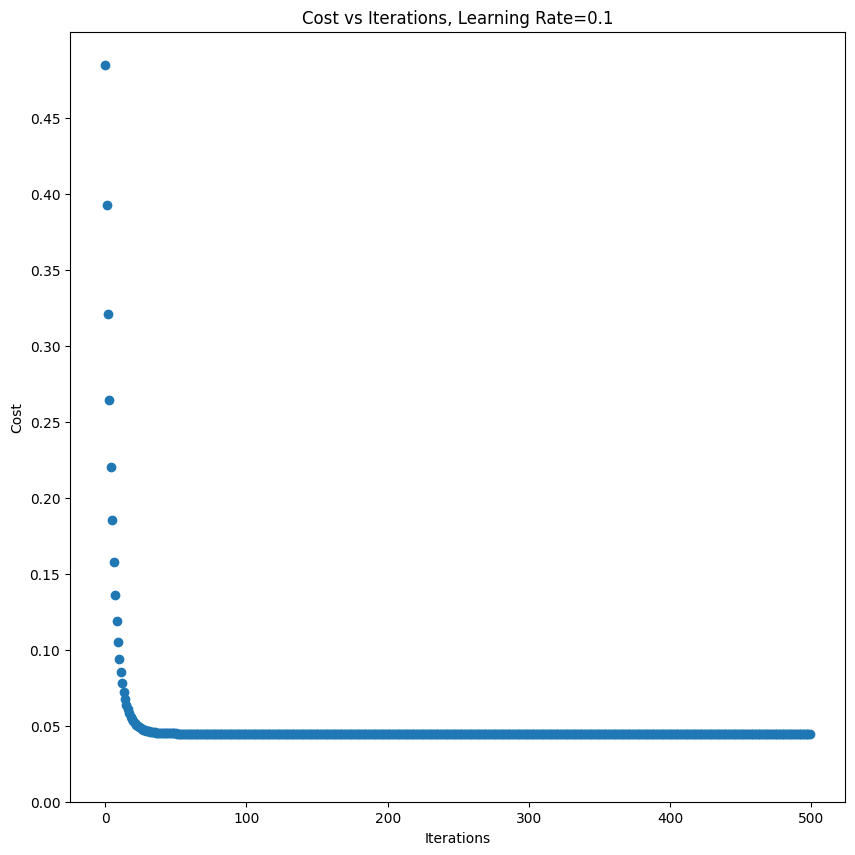

In [637]:
# parameters
learning_rate = 0.1
num_iterations = 500

# run gradient descent
weights, cost_history = grad_descent(x_train, y_train, learning_rate, num_iterations)
plot_costs(cost_history, learning_rate)

In [638]:
print('TRAIN SET')

y_train_pred = predict(x_train, weights)
mse_train = compute_cost(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f'first 5 pred: {calculate_orig(y_train_pred[:5])}')
print(f'first 5 real: {calculate_orig(y_train[:5].values)}')
print(f'mse: {mse_train}')
print(f' r2: {r2_train}')

print('\nTEST SET')

y_test_pred = predict(x_test, weights)
mse_test = compute_cost(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'first 5 pred: {calculate_orig(y_test_pred[:5])}')
print(f'first 5 real: {calculate_orig(y_test[:5].values)}')
print(f'mse: {mse_test}')
print(f' r2: {r2_test}')

TRAIN SET
first 5 pred: [10.62420524 19.5419182  18.37463236 15.26284415 10.02487307]
first 5 real: [12.4 19.7 17.6 15.5 10.1]
mse: 0.04479705132564237
 r2: 0.9072183330817297

TEST SET
first 5 pred: [10.0494569   7.43052335  6.97152143 24.16378667 12.00215643]
first 5 real: [11.3  8.4  8.7 25.4 11.7]
mse: 0.0736999336653349
 r2: 0.8576396745320891


### 1. What are the optimal weights found by your implemented gradient descent?  
#### Plug it into the linear model:
##### <center> h_theta(x) = theta_0 + theta_1*TV + theta_2*Radio + theta_3*Newspaper </center>

In [639]:
bias = weights[0]
tv = weights[1]
radio = weights[2]
newspaper = weights[3]

print(f'weights: \n{weights}')
print(f'\nh_theta(x) = {bias} + {tv}*TV + {radio}*Radio + {newspaper}*Newspaper')

index = 4
sample = data.iloc[index]

print('\nSAMPLE')
print(sample[:4])

print('\nSTANDARDIZED')
h_theta = bias + tv * sample['tv'] + radio * sample['radio'] + newspaper * sample['newspaper']

print(f'pred: {h_theta}')
print(f'real: {data['sales'].iloc[index]}')

print('\nCALCULATED ORIGINAL')
print(f'pred: {calculate_orig(h_theta)}')
print(f'real: {raw_data['sales'].iloc[index]}')

weights: 
bias         0.005550
tv           0.726700
radio        0.566285
newspaper    0.004853
dtype: float64

h_theta(x) = 0.005550213160979623 + 0.7266997807173272*TV + 0.5662854364193882*Radio + 0.0048532324650542805*Newspaper

SAMPLE
bias         1.000000
tv           0.393196
radio       -0.839507
newspaper    1.278593
Name: 4, dtype: float64

STANDARDIZED
pred: -0.17790996617288876
real: -0.21514314223086323

CALCULATED ORIGINAL
pred: 13.094262478885934
real: 12.9


In [640]:
print('MEAN ADS')
print(f'pred: {calculate_orig(bias)}')
print(f'real: {raw_data['sales'].mean()}')

print('\nNO ADS')
no_tv = scale(0, 'tv')
no_radio = scale(0, 'radio')
no_newspaper = scale(0, 'newspaper')

no_ads = np.array([1, no_tv, no_radio, no_newspaper])
no_ads_pred = predict(no_ads, weights)

print(f'pred: {no_ads_pred}')
print(f'real: {calculate_orig(no_ads_pred)}')

MEAN ADS
pred: 14.051457996097847
real: 14.0225

NO ADS
pred: -2.1332098904273753
real: 2.8925700511511625


#### What are your interpretations regarding the formed linear model?

With a small bias weight of ~0.005550, the model predicts that if no ads were invested, there will only be ~2.892570 in Sales, which is a farcry from the company's average Sales of 14.0225. Hence, the model suggests that there will only be some miniscule Sales if there were no advertisements. 

TV had a weight of ~0.726700 which is the highest, followed by radio with ~0.566285, and newspaper with a measly ~0.004853. This indicates that: 
* for every unit increase in TV (holding others constant), there is a corresponding increase of ~0.726700 units in the model's prediction of Sales.  
* for every unit increase in Radio (holding others constant), there is a corresponding increase of ~0.566285 units in the model's prediction of Sales.
* and, for every unit increase in Newspaper (holding others constant), there is a corresponding increase of ~0.004853 units in the model's prediction of Sales.

The model suggests that TV advertising is the most effective at increasing Sales output, followed by Radio advertising. On the other hand, Newspaper advertising has a negligible effect on Sales output.